In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time

# Searching and Sorting

When we deal with large amounts of data it is pretty common to need to be able to find something or reorder it - aka searching and sorting. These are also two places where we can see the performance denoted by our Big O notation very clearly, as all of the different sorting algorithms will provide us with the same results, but they perform differently. 

First, we can define the terms that we'll be looking at:
<ul>
<li> Serarching - finding a specific value in a collection of values </li>
<li> Sorting - reordering a collection of values </li>
</ul>

Each of these actions are related, and each can be accomplished in a variety of ways with a variety of algorithms. We'll look at searching and sorting from a relatively high level, we don't need to worry much about the algorithmic details in most scenarios but we do need to be able to search for things or sort our data. In addition, thinking about how things work inside our data structures can help us understand how to use them more effectively and save ourselves effort and errors. 

![Sorting Algorithms](../../images/sorting-algorithm.gif "Sorting Algorithms")
![Sorting Algorithms](../images/sorting-algorithm.gif "Sorting Algorithms")

<b>Note:</b> This notebook is not meant to be a comprehensive guide to searching and sorting, but rather a quick overview of the most common algorithms and some of the things to consider when choosing one.

## O-Notation Revisited

When looking at sorting algorithms we tend to frequently focus on the speed, approximated by the Big O Notation. Recall that this shows us an estimation of the running time of an algorithm, and how it grows as the input size grows. Since all sorting algorithms should provide us with (mostly) the same results, we can shift our focus to performance. 

In general, the most important determinant of a sorting algorithm's performance is the number of comparisons it makes - ultimately each decision on the order in which to put items depends on a comparison and a decision if item A or item B should be first. While an algorithm does other stuff, like placing something into a list of results, we can look at the comparisons to get a reliable estimate across different algorithms. 

### Speed

The following table shows the number of comparisons for different input sizes for the most common sorting algorithms.

| Algorithm | Best Case | Average Case | Worst Case |
| --- | --- | --- | --- |
| Bubble Sort | $n$ | $n^2$ | $n^2$ |
| Selection Sort | $n^2$ | $n^2$ | $n^2$ |
| Insertion Sort | $n$ | $n^2$ | $n^2$ |
| Merge Sort | $n\log n$ | $n\log n$ | $n\log n$ |
| Quick Sort | $n\log n$ | $n\log n$ | $n^2$ |

This table shows that there is not one value for expected performance, there's a range. This is usually not super critical to pay attention to but can come up in certain scenarios - it is possible that we may have data that is faster with "slower" algorithms due to size, it is also possible to have data with an original order that yields swings towards the best or worst case.

### Memory

Another important aspect of sorting algorithms is the amount of memory they use. This is especially important when sorting large amounts of data. The following table shows the memory requirements for different sorting algorithms. The memory requirements can sometimes come up in larger datasets when making predictive models - it is possible to have enough data that we can't use an algorithm that requires 2x memory, for example.

| Algorithm | Worst Case |
| --- | --- |
| Bubble Sort | $1$ |
| Selection Sort | $1$ |
| Insertion Sort | $1$ |
| Merge Sort | $n$ |
| Quick Sort | $n$ |

This is something that we may need to care about in data science, as our datasets can get large. This means that an algorithm that is O(1), or doesn't require any additional memory, can be preferable even at a cost of speed. 

### Stability

A sorting algorithm is called stable if it preserves the relative order of elements with equal values. For example, if we have a list of tuples with a name and an age, and we sort the list by age, a stable sorting algorithm will preserve the relative order of people with the same age.

| Algorithm | Stable |
| --- | --- |
| Bubble Sort | Yes |
| Selection Sort | No |
| Insertion Sort | Yes |
| Merge Sort | Yes |
| Quick Sort | No |

Stability is something that is very important, a small percentage of the time. In particular, when we are doing data science work it is common to split data and rely on the order to reassemble it later. If we use a stable sort, we could trust it to provide results that are predictable. If we use an unstable sort, we may get different results each time we run the code. (Sorting our data in parts like this is not common, but it is possible.)

There is no shortage of sorting algorithms, Wikipedia has a pretty long list here: https://en.wikipedia.org/wiki/Sorting_algorithm 

### Generate Test Data

We can make some test data of different sizes to test our algorithms on by creating some random values. 

In [2]:
# generate list of random numbers
import random

DATA_SIZE = 100
RAND_SEED = 1
MULTIPLES = [1, 10, 100, 250, 500]

random.seed(RAND_SEED)
random1 = [random.randint(1, 100) for i in range(DATA_SIZE*MULTIPLES[0])]
random2 = [random.randint(1, 100) for i in range(DATA_SIZE*MULTIPLES[1])]
random3 = [random.randint(1, 100) for i in range(DATA_SIZE*MULTIPLES[2])]
random4 = [random.randint(1, 100) for i in range(DATA_SIZE*MULTIPLES[3])]
random5 = [random.randint(1, 100) for i in range(DATA_SIZE*MULTIPLES[4])]


timeResults = {}
countsResults = {}


## Passing Functions as Arguments

In Python, everything is an object, including functions - so we can do anything that we can do on any other objects to our functions. This includes passing a function as an argument to another function, just as we would pass a string or a list.

This probably seems odd at first, as why would we make a function that needs to be combined with another function? Wouldn't it make more sense to just make the function do everything? Well, yes, but there are some cases where it is useful to be able to pass a function as an argument to another function. For example, we can use this to make a function that will time how long it takes to run another function, or we can use a function like apply or map to target another function on our data without having to write a loop.

Passing functions as arguments is also a key part of functional programming, which is a programming paradigm that is common in the programming world in general and in data science in particular. Functional programming is a style of programming that emphasizes the use of functions as the primary means of abstraction. This means that we try to write our code in terms of functions that take in arguments and return values, rather than in terms of objects that have attributes and methods. This is a very different way of thinking about programming, and it can take some getting used to, but it is a very powerful way of thinking about programming, and it is worth learning. For us, the most common applications of functional programming are scenarios where we want to use a function on "a bunch of stuff" like we do with map or apply, or when we need to pass functions in for other functions to use (which is like map or apply, but tends to feel a bit different)

## Functions and State

In OOP we normally hold state "in" and object by setting values in its attributes. We can create new data structures, Cards, Animals, or other objects and we can wrap up the attributes that describe them, their state, directly inside that object. We can also create functions that act on those objects, and we can use those functions to change the state of the object - either by making methods to define what an object "can do", or by calling some other function to act on an attribute that we extract from our object. 

We have already used some functional programming concepts in other scenarios, like the map and apply that we can use to execute a function over an entire data structure at once. Recursion is also a functional programming concept, we keep calling the same function over and over again, and we don't have any state that we are changing.

Personally, I'd argue towards building larger things following mostly OOP principles. I'd argue that it is easier for programmers, especially newer ones, to understand what is going on in a program that is written in an OOP style and likely maps more closely to their mental model of reality. Functional programming code tends to feel more abstract and harder to understand - we tend to have a lot of "we're doing some action on some data" and defining functions to be used in many ways, which can be hard to follow.

## Sort Timer

We can build a very simple example that demonstrates the concepts well. Suppose our goal is to time several sort algorithms so we can measure their efficiency - this requires doing the exact same thing, sorting values, with only one change from one iteration to the next - which sorting function is used. This is a perfect use case for passing functions as arguments, as we can write a function that sets a timer, runs a function, and captures results. The special bit is that rather than calling a function by name, or using something like an if statement to decide which to use, we'll pass in the function itself, and the timer function will call it. In this case, that sort function could be anything, as long as it matches the arguments - all the timer does is to act as a framework, and do whatever is passed in as a function.

The `func` argument here is a function, and we can call it just like any other function. We just pass it around like an object, which it also is!!

## Exercise - Make a Timer Harness

Complete this function so that it takes in:
<ul>
<li> Arguments - function to use and a list of values</li>
<li> Returns - the time it takes to run that function on those values as well as the data</li>
</ul>

You can use the `time` module to get the current time, and you can use the `time` module to get the current time again and subtract the two to get the elapsed time.

Use the tests below to create the function.

In [3]:
def sortTimer(func, iterable):

    start = time.time()
    result = func(iterable)
    end = time.time()
    return (end - start), result
    

In [4]:
def bubbleSort(arr):
    n = len(arr)
     
    # Traverse through all array elements
    for i in range(n):
        swapped = False
 
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # Traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if (swapped == False):
            break

In [5]:
timeDoubleLoop, resultDoubleLoop = sortTimer(bubbleSort, random1)
timeResults['doubleLoop'] = timeDoubleLoop
countsResults['doubleLoop'] = len(random1)
timeDoubleLoop2, resultDoubleLoop2 = sortTimer(bubbleSort, random2)
timeResults['doubleLoop2'] = timeDoubleLoop2
countsResults['doubleLoop2'] = len(random2)
timeDoubleLoop3, resultDoubleLoop3 = sortTimer(bubbleSort, random3)
timeResults['doubleLoop3'] = timeDoubleLoop3
countsResults['doubleLoop3'] = len(random3)
timeDoubleLoop4, resultDoubleLoop4 = sortTimer(bubbleSort, random4)
timeResults['doubleLoop4'] = timeDoubleLoop4
countsResults['doubleLoop4'] = len(random4)
timeDoubleLoop5, resultDoubleLoop5 = sortTimer(bubbleSort, random5)
timeResults['doubleLoop5'] = timeDoubleLoop5
countsResults['doubleLoop5'] = len(random5)


timeDoubleLoop, timeDoubleLoop2, timeDoubleLoop3, timeDoubleLoop4, timeDoubleLoop5

<Axes: >

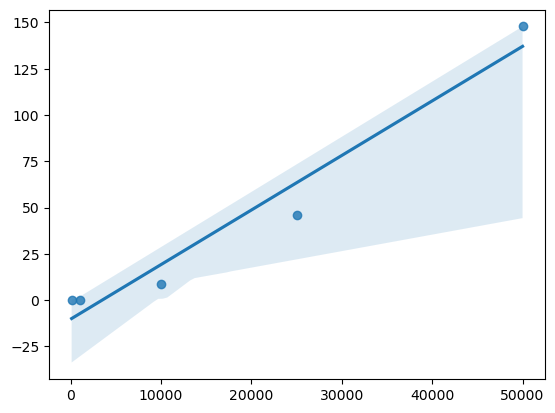

In [ ]:
bubbleTimes = [timeResults['doubleLoop'], timeResults['doubleLoop2'], timeResults['doubleLoop3'], timeResults['doubleLoop4'], timeResults['doubleLoop5']]
bubbleCounts = [countsResults['doubleLoop'], countsResults['doubleLoop2'], countsResults['doubleLoop3'], countsResults['doubleLoop4'], countsResults['doubleLoop5']]
sns.regplot(x=bubbleCounts, y=bubbleTimes)

<b>Note:</b> Assuming the test above works, you can click Run All to run some tests below. They can be a bit slow. 

## Selection Sort

Selection sort might be the most simple algorithm that sorts, but it is also generally the least efficient. The algorithm divides the input list into two parts:
<ul>
<li> The sublist of items already sorted, which is built up from left to right at the front (left) of the list.</li>
<li> The sublist of items remaining to be sorted that occupy the rest of the list.</li>
</ul>

Initially, the sorted sublist is empty and the unsorted sublist is the entire input list. The algorithm proceeds by finding the smallest (or largest, depending on sorting order) element in the unsorted sublist, exchanging (swapping) it with the leftmost unsorted element (putting it in sorted order), and moving the sublist boundaries one element to the right. This algorithm is very simple, but it can also be very slow, let's look at why...

### Selection Sort Speed

Selection sort is very slow, and we can use our loop deduction skills to examine why. 

In [ ]:
def selectionSort(values):

    for i in range(len(values)):
        min_idx = i
        for j in range(i+1, len(values)):
            if values[min_idx] > values[j]:
                min_idx = j
        values[i], values[min_idx] = values[min_idx], values[i]
    return values

In [ ]:
selTime, selResult = sortTimer(selectionSort, random1)
timeResults['selectionSort'] = selTime
countsResults['selectionSort'] = len(random1)
selTime2, selResult2 = sortTimer(selectionSort, random2)
timeResults['selectionSort2'] = selTime2
countsResults['selectionSort2'] = len(random2)
selTime3, selResult3 = sortTimer(selectionSort, random3)
timeResults['selectionSort3'] = selTime3
countsResults['selectionSort3'] = len(random3)
selTime4, selResult4 = sortTimer(selectionSort, random4)
timeResults['selectionSort4'] = selTime4
countsResults['selectionSort4'] = len(random4)
selTime5, selResult5 = sortTimer(selectionSort, random5)
timeResults['selectionSort5'] = selTime5
countsResults['selectionSort5'] = len(random5)

selTime, selTime2, selTime3, selTime4, selTime5

(0.0003561973571777344,
 0.03149676322937012,
 2.3435869216918945,
 17.589977264404297,
 71.49776196479797)

<Axes: >

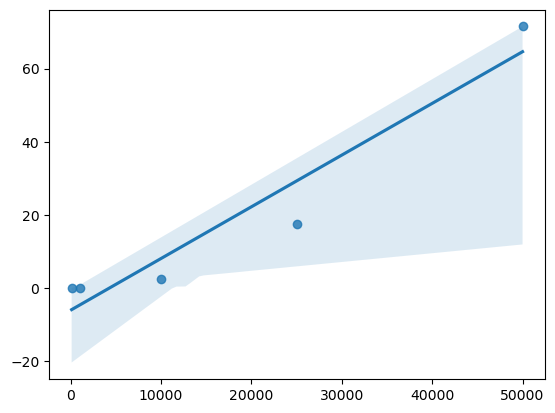

In [ ]:
selTimes = [timeResults['selectionSort'], timeResults['selectionSort2'], timeResults['selectionSort3'], timeResults['selectionSort4'], timeResults['selectionSort5']]
selCounts = [countsResults['selectionSort'], countsResults['selectionSort2'], countsResults['selectionSort3'], countsResults['selectionSort4'], countsResults['selectionSort5']]
sns.regplot(x=selCounts, y=selTimes)

## Insertion Sort

Insertion sort is a simple sorting algorithm that builds the final sorted array (or list) one item at a time. It is much less efficient on large lists than more advanced algorithms such as quicksort, heapsort, or merge sort. However, insertion sort provides several advantages:

<ul>
<li> Simple implementation: Jon Bentley shows a three-line C version, and a five-line optimized version[1]</li>
<li> Efficient for (quite) small data sets, much like other quadratic sorting algorithms</li>
<li> More efficient in practice than most other simple quadratic (i.e., O(n2)) algorithms such as selection sort or bubble sort</li>
<li> Adaptive, i.e., efficient for data sets that are already substantially sorted: the time complexity is O(kn) when each element in the input is no more than k places away from its sorted position</li>
<li> Stable; i.e., does not change the relative order of elements with equal keys</li>
<li> In-place; i.e., only requires a constant amount O(1) of additional memory space</li>
<li> Online; i.e., can sort a list as it receives it</li>
</ul>

When humans manually sort something (for example, a deck of playing cards), most use a method that is similar to insertion sort.[2] The algorithm starts with an empty left hand and the cards face down on the table. Then, one card at a time is removed from the table and inserted into the correct position in the left hand. To find the correct position for a card, it is compared with each of the cards already in the hand, from right to left. At all times, the cards held in the left hand are sorted, and these cards were originally the top cards of the pile on the table.

In [ ]:
def insertionSort(values):

    for i in range(1, len(values)):
        key = values[i]
        j = i-1

        while j >= 0 and key < values[j]:
            values[j+1] = values[j]
            j -= 1
        values[j+1] = key
    return values

In [ ]:
insTime, insResult = sortTimer(insertionSort, random1)
timeResults['insertionSort'] = insTime
countsResults['insertionSort'] = len(random1)
insTime2, insResult2 = sortTimer(insertionSort, random2)
timeResults['insertionSort2'] = insTime2
countsResults['insertionSort2'] = len(random2)
insTime3, insResult3 = sortTimer(insertionSort, random3)
timeResults['insertionSort3'] = insTime3
countsResults['insertionSort3'] = len(random3)
insTime4, insResult4 = sortTimer(insertionSort, random4)
timeResults['insertionSort4'] = insTime4
countsResults['insertionSort4'] = len(random4)
insTime5, insResult5 = sortTimer(insertionSort, random5)
timeResults['insertionSort5'] = insTime5
countsResults['insertionSort5'] = len(random5)

insTime, insTime2, insTime3, insTime4, insTime5

(1.3828277587890625e-05,
 0.00013494491577148438,
 0.0015139579772949219,
 0.004500865936279297,
 0.0077800750732421875)

<Axes: >

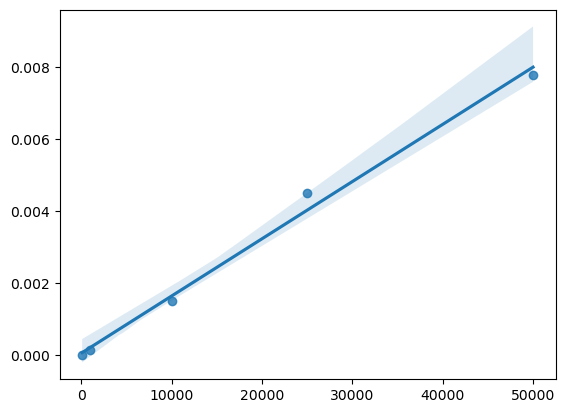

In [ ]:
insTimes = [timeResults['insertionSort'], timeResults['insertionSort2'], timeResults['insertionSort3'], timeResults['insertionSort4'], timeResults['insertionSort5']]
insCounts = [countsResults['insertionSort'], countsResults['insertionSort2'], countsResults['insertionSort3'], countsResults['insertionSort4'], countsResults['insertionSort5']]
sns.regplot(x=insCounts, y=insTimes)

### Merge Sort

Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.[2] A detailed description and analysis of bottom-up mergesort appeared in a report by Goldstine and von Neumann as early as 1948.[3] 

In [ ]:
def mergeSort(values):
    if len(values) > 1:
        mid = len(values)//2
        left = values[:mid]
        right = values[mid:]
        mergeSort(left)
        mergeSort(right)
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                values[k] = left[i]
                i += 1
            else:
                values[k] = right[j]
                j += 1
            k += 1
        while i < len(left):
            values[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            values[k] = right[j]
            j += 1
            k += 1
    return values

In [ ]:
merTime, merResult = sortTimer(mergeSort, random1)
timeResults['mergeSort'] = merTime
countsResults['mergeSort'] = len(random1)
merTime2, merResult2 = sortTimer(mergeSort, random2)
timeResults['mergeSort2'] = merTime2
countsResults['mergeSort2'] = len(random2)
merTime3, merResult3 = sortTimer(mergeSort, random3)
timeResults['mergeSort3'] = merTime3
countsResults['mergeSort3'] = len(random3)
merTime4, merResult4 = sortTimer(mergeSort, random4)
timeResults['mergeSort4'] = merTime4
countsResults['mergeSort4'] = len(random4)
merTime5, merResult5 = sortTimer(mergeSort, random5)
timeResults['mergeSort5'] = merTime5
countsResults['mergeSort5'] = len(random5)

merTime, merTime2, merTime3, merTime4, merTime5

(0.00019502639770507812,
 0.002811908721923828,
 0.03624534606933594,
 0.09865283966064453,
 0.19424986839294434)

<Axes: >

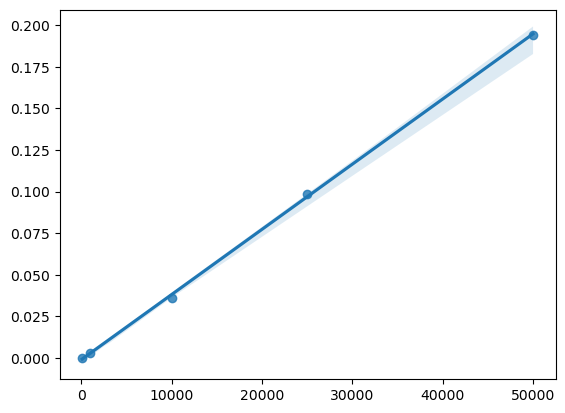

In [ ]:
merTimes = [timeResults['mergeSort'], timeResults['mergeSort2'], timeResults['mergeSort3'], timeResults['mergeSort4'], timeResults['mergeSort5']]
merCounts = [countsResults['mergeSort'], countsResults['mergeSort2'], countsResults['mergeSort3'], countsResults['mergeSort4'], countsResults['mergeSort5']]
sns.regplot(x=merCounts, y=merTimes)

## Quicksort

Quicksort (sometimes called partition-exchange sort) is an efficient sorting algorithm, serving as a systematic method for placing the elements of an array in order. Developed by Tony Hoare in 1959[1] and published in 1961,[2] it is still a commonly used algorithm for sorting. When implemented well, it can be about two or three times faster than its main competitors, merge sort and heapsort.[3]

Quicksort is a comparison sort, meaning that it can sort items of any type for which a "less-than" relation (formally, a total order) is defined. In efficient implementations it is not a stable sort, meaning that the relative order of equal sort items is not preserved. Quicksort can operate in-place on an array, requiring small additional amounts of memory to perform the sorting. The algorithm is recursive and efficient, as well as being relatively easy to implement. Mathematical analysis of quicksort shows that, on average, the algorithm takes O(n log n) comparisons to sort n items. In the worst case, it makes O(n2) comparisons, though this behavior is rare. This is one example where the performance can be generally quite good, then explode if we hit an edge case.

Here is a normal implementation of quicksort, which is a recursive algorithm.

```python
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)
```

<b>Note:</b>Below there's an implementation without recursion, so we can compare with the others without hitting that recursive call. The performance of this one isn't necessarily indicative of the recursive version. 

In [ ]:
def quickSort(arr):
    
    stack = [(0, len(arr) - 1)]

    while stack:
        low, high = stack.pop()

        pivot = arr[high]
        i = low - 1

        for j in range(low, high):
            
            if arr[j] <= pivot:
                i = i + 1
                arr[i], arr[j] = arr[j], arr[i]

        arr[i + 1], arr[high] = arr[high], arr[i + 1]

        if i > low:
            stack.append((low, i - 1))
        if i + 2 < high:
            stack.append((i + 2, high))

    return arr

In [ ]:
import sys
sys.setrecursionlimit(30000)

quickTime, quickResult = sortTimer(quickSort, random1)
timeResults['quickSort'] = quickTime
countsResults['quickSort'] = len(random1)
quickTime2, quickResult2 = sortTimer(quickSort, random2)
timeResults['quickSort2'] = quickTime2
countsResults['quickSort2'] = len(random2)
quickTime3, quickResult3 = sortTimer(quickSort, random3)
timeResults['quickSort3'] = quickTime3
countsResults['quickSort3'] = len(random3)
quickTime4, quickResult4 = sortTimer(quickSort, random4)
timeResults['quickSort4'] = quickTime4
countsResults['quickSort4'] = len(random4)
quickTime5, quickResult5 = sortTimer(quickSort, random5)
timeResults['quickSort5'] = quickTime5
countsResults['quickSort5'] = len(random5)

quickTime, quickTime2, quickTime3, quickTime4, quickTime5

(0.00027298927307128906,
 0.03656601905822754,
 3.9828479290008545,
 29.18209981918335,
 92.21351909637451)

<Axes: >

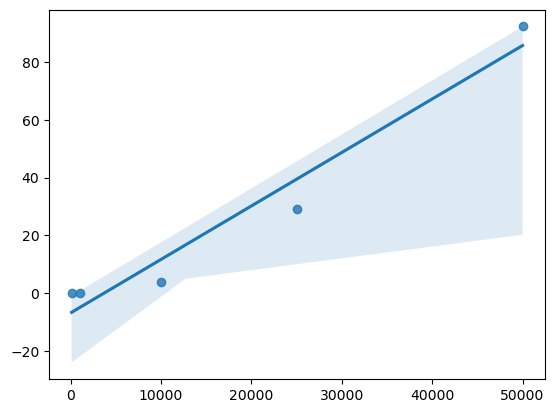

In [ ]:
quickTimes = [timeResults['quickSort'], timeResults['quickSort2'], timeResults['quickSort3'], timeResults['quickSort4'], timeResults['quickSort5']]
quickCounts = [countsResults['quickSort'], countsResults['quickSort2'], countsResults['quickSort3'], countsResults['quickSort4'], countsResults['quickSort5']]
sns.regplot(x=quickCounts, y=quickTimes)

## Heap Sort

Heapsort is a comparison-based sorting algorithm. Heapsort can be thought of as an improved selection sort: like that algorithm, it divides its input into a sorted and an unsorted region, and it iteratively shrinks the unsorted region by extracting the largest element from it and inserting it into the sorted region. Unlike selection sort, heapsort does not waste time with a linear-time scan of the unsorted region; rather, heap sort maintains the unsorted region in a heap data structure to more quickly find the largest element in each step.

In [ ]:
def heapsort(arr):

    def heapify(arr, n, i):
        largest = i
        left_child = 2 * i + 1
        right_child = 2 * i + 2

        if left_child < n and arr[left_child] > arr[largest]:
            largest = left_child

        if right_child < n and arr[right_child] > arr[largest]:
            largest = right_child

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    # Build a max heap
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

    return arr


In [ ]:
heapTime, heapResult = sortTimer(heapsort, random1)
timeResults['heapSort'] = heapTime
countsResults['heapSort'] = len(random1)
heapTime2, heapResult2 = sortTimer(heapsort, random2)
timeResults['heapSort2'] = heapTime2
countsResults['heapSort2'] = len(random2)
heapTime3, heapResult3 = sortTimer(heapsort, random3)
timeResults['heapSort3'] = heapTime3
countsResults['heapSort3'] = len(random3)
heapTime4, heapResult4 = sortTimer(heapsort, random4)
timeResults['heapSort4'] = heapTime4
countsResults['heapSort4'] = len(random4)
heapTime5, heapResult5 = sortTimer(heapsort, random5)
timeResults['heapSort5'] = heapTime5
countsResults['heapSort5'] = len(random5)

heapTime, heapTime2, heapTime3, heapTime4, heapTime5

(0.0002281665802001953,
 0.0037813186645507812,
 0.09233593940734863,
 0.12775921821594238,
 0.2654237747192383)

<Axes: >

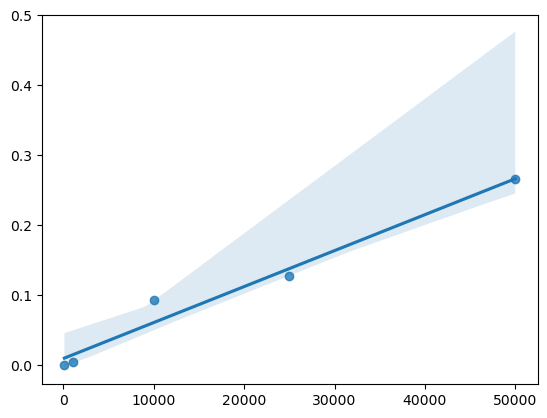

In [ ]:
heapTimes = [timeResults['heapSort'], timeResults['heapSort2'], timeResults['heapSort3'], timeResults['heapSort4'], timeResults['heapSort5']]
heapCounts = [countsResults['heapSort'], countsResults['heapSort2'], countsResults['heapSort3'], countsResults['heapSort4'], countsResults['heapSort5']]
sns.regplot(x=heapCounts, y=heapTimes)

## Tim Sort

We can compare to the built-in sort, which is a hybrid of merge sort and insertion sort. It is a stable sort, which means that it preserves the input order of equal elements in the sorted output. It is also adaptive, which means that it is faster when the input array is partially sorted, and it performs in O(n log n) time in the worst case.

In [ ]:
timTime, timResult = sortTimer(sorted, random1)
timeResults['timSort'] = timTime
countsResults['timSort'] = len(random1)
timTime2, timResult2 = sortTimer(sorted, random2)
timeResults['timSort2'] = timTime2
countsResults['timSort2'] = len(random2)
timTime3, timResult3 = sortTimer(sorted, random3)
timeResults['timSort3'] = timTime3
countsResults['timSort3'] = len(random3)
timTime4, timResult4 = sortTimer(sorted, random4)
timeResults['timSort4'] = timTime4
countsResults['timSort4'] = len(random4)
timTime5, timResult5 = sortTimer(sorted, random5)
timeResults['timSort5'] = timTime5
countsResults['timSort5'] = len(random5)

timTime, timTime2, timTime3, timTime4, timTime5

(2.1457672119140625e-06,
 6.9141387939453125e-06,
 8.606910705566406e-05,
 0.0004942417144775391,
 0.0005369186401367188)

<Axes: >

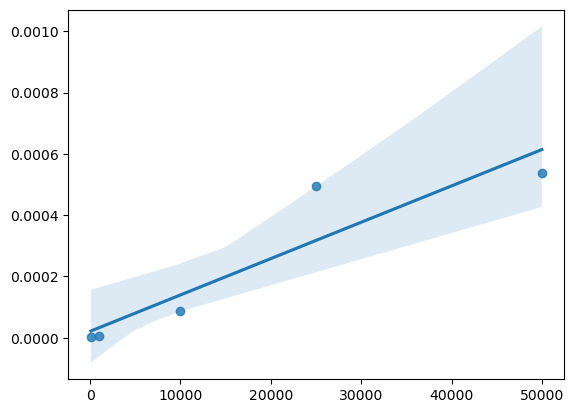

In [ ]:
timTimes = [timeResults['timSort'], timeResults['timSort2'], timeResults['timSort3'], timeResults['timSort4'], timeResults['timSort5']]
timCounts = [countsResults['timSort'], countsResults['timSort2'], countsResults['timSort3'], countsResults['timSort4'], countsResults['timSort5']]
sns.regplot(x=timCounts, y=timTimes)

## Compare Results

We can plot the times for each of the algorithms to see how they compare.

<Axes: >

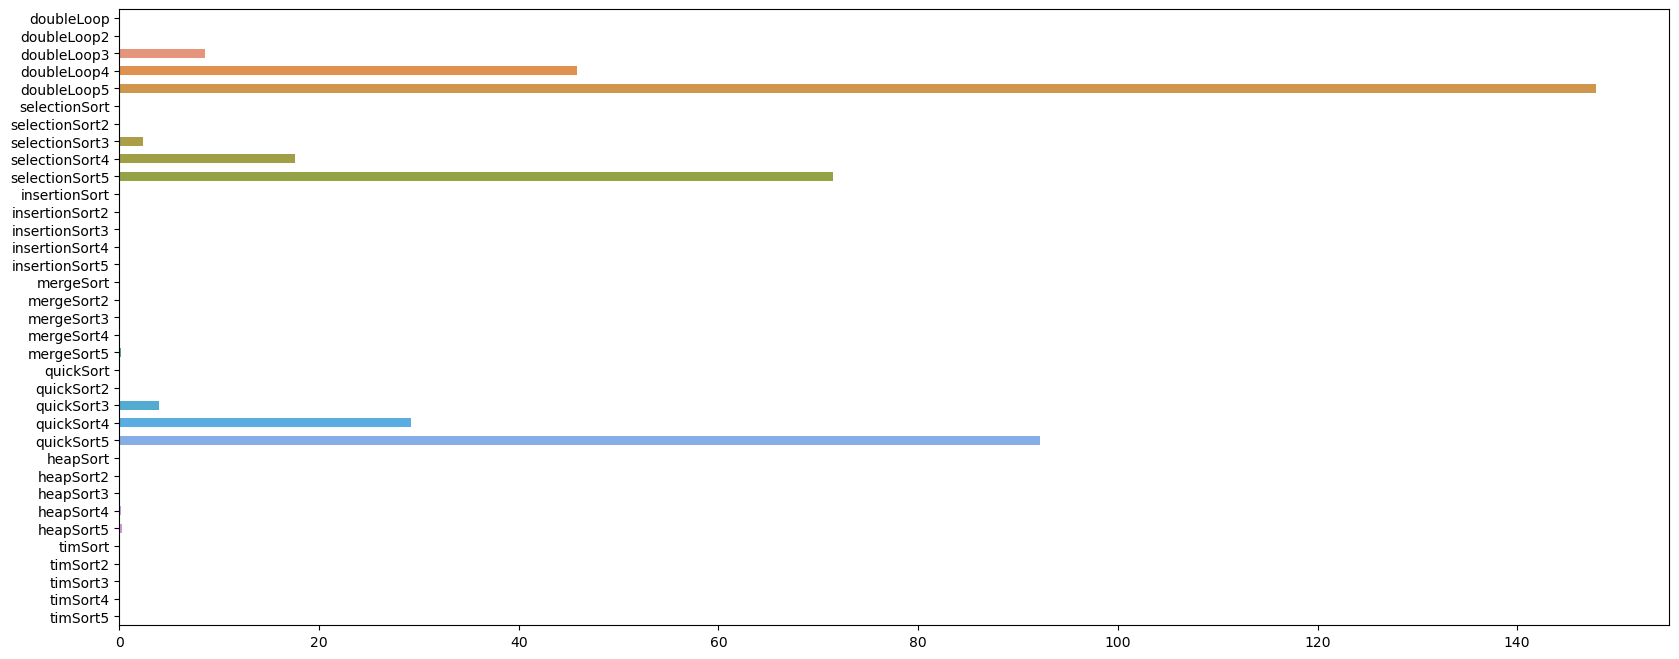

In [ ]:

# Horizontal Bar Plot
plt.figure(figsize=(20, 8))
sns.barplot(y=list(timeResults.keys()), x=list(timeResults.values()), width=0.5)

<Axes: >

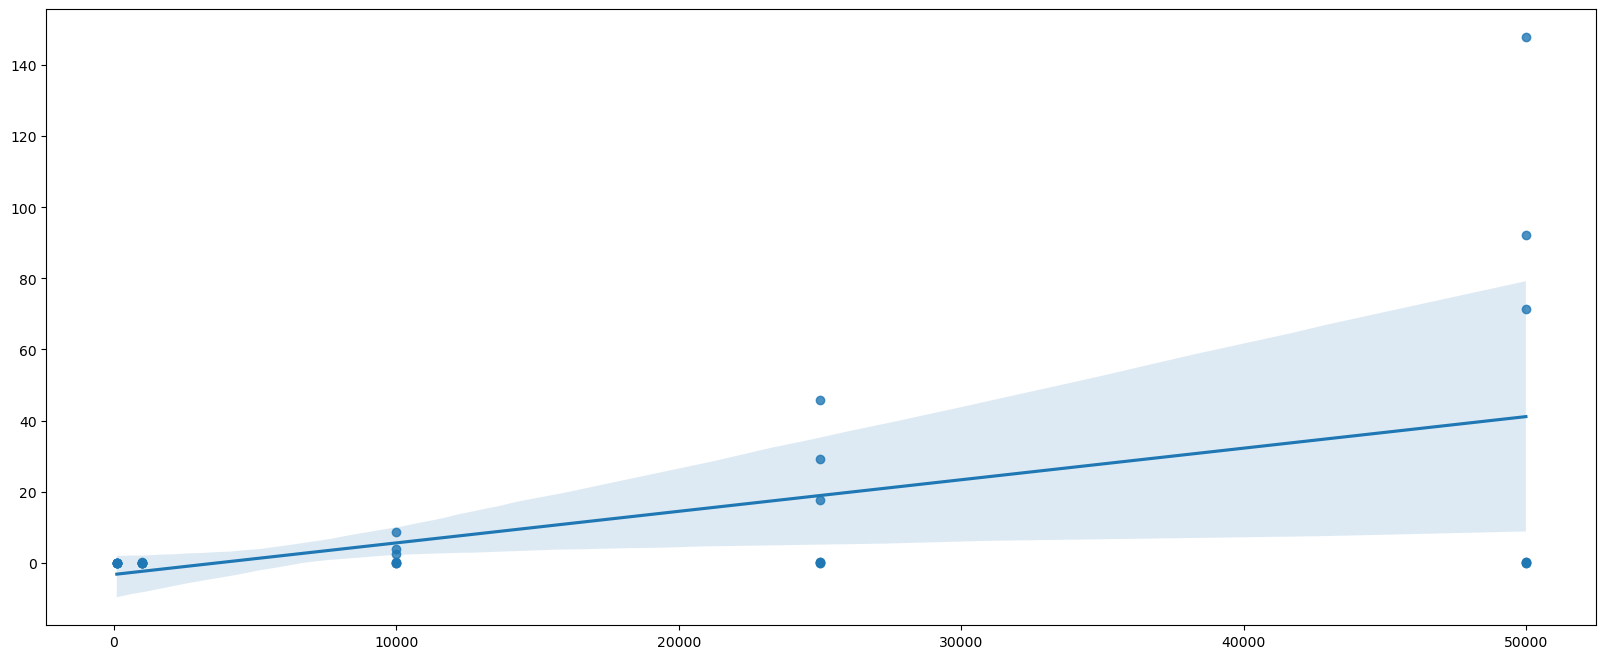

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x=list(countsResults.values()), y=list(timeResults.values()))

## So, What Do I Use?

For the most part, sorting efficiency is something that is rarely a major consideration and we can just use "whatever". In data science, we do have some cases where we might need to care, as we often deal with massive datasets. Sorting is not a super common task in predictive analytics, but it can come up - particularly if we are building something that will have a user interface. It is fairly common for users to want to see data in order, and if so we'll need to sort that data for them. 

Sorting algorithms are a real point of interest from the more mathematically inclined people in computing science, but for the most part it is a solved problem from our point of view. We can just use the built-in sorting functions in Python, and we'll be fine. There are specific scenarios that may result in significant differences if a specific sorting algorithm is used, those scenarios are quite rare and as long as we have a basic understanding of the theory of sorting we can research and make a reasonable decision as the need arises. In all likelihood, we'll never need to worry about it. 

### Python Sorting

Python has a built-in sorting function, sorted, that we can use to sort any iterable. This function is very fast, and it is also very flexible. We can use it to sort lists, tuples, dictionaries, and even custom objects. The sorted function takes an iterable as an argument, and returns a sorted list. The original iterable is not modified.

The sorted function uses the incredibly named Timsort, a hybrid sorting algorithm derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data. It was invented by Tim Peters in 2002 for use in the Python programming language. The algorithm finds subsets of the data that are already ordered, and uses the subsets to sort the data more efficiently. This is done by merging an identified subset, called a run, with existing runs until certain criteria are fulfilled. Timsort has been Python's standard sorting algorithm since version 2.3. It is now also used to sort arrays in Java SE 7, and on the Android platform.

## Searching

A close relative of sorting data is searching for data, or locating an item in a data structure. We can use the same Big O notation to describe the efficiency of searching algorithms, and we can use the same techniques to analyze them.

Searching is something that we can think of intuitively quite well, and we can use that intuition to help us understand the algorithms. In the most simple, and general, sense, if we want to know if some item is in a group of items we need to have at least one of two things happen:
<ul>
<li> We need to look at every item in the group, or</li>
<li> We need to have some information about the group that we can use to eliminate some items from consideration.</li>
</ul>

The first point is a linear search, looking at each item one by one until we find the one we want. The second point enables quicker and more efficient searching as it allows us to avoid having to check each item by building some additional information about those items into the data structure. For example, a sorted list tells us that if we look at one item, everything on one side is smaller and everything on the other side is larger. If we check one item in the list, we can eliminate one side or the other from consideration.

### Linear Search

Linear search is the simplest search algorithm, and it is also the least efficient. Linear search is a method for finding a particular value in a list, that consists of checking every one of its elements, one at a time and in sequence, until the desired one is found. Linear search is the simplest search algorithm; it is a special case of brute-force search. Its worst case cost is proportional to the number of elements in the list; and so is its expected cost, if all list elements are equally likely to be searched for. Therefore, if the list has more than a few elements, other methods (such as binary search, hash tables, or B-trees) are preferable for their efficiency. Linear search is rarely practical because other search algorithms and schemes, such as the binary search algorithm and hash tables, allow significantly faster searching for all but short lists.

### Binary Search

Binary search is a search algorithm that finds the position of a target value within a sorted array. Binary search compares the target value to the middle element of the array. If they are not equal, the half in which the target cannot lie is eliminated and the search continues on the remaining half, again taking the middle element to compare to the target value, and repeating this until the target value is found. If the search ends with the remaining half being empty, the target is not in the array.

Binary search runs in logarithmic time in the worst case, making O(log n) comparisons, where n is the number of elements in the array. Binary search is faster than linear search except for small arrays. However, the array must be sorted first to be able to apply binary search. There are specialized data structures designed for fast searching, such as hash tables, that can be searched more efficiently than binary search. However, binary search can be used to solve a wider range of problems, such as finding the next-smallest or next-largest element in the array relative to the target even if it is absent from the array. Using a binary search is faster, but relies on creating or converting data into a sorted data structure, something that requires extra time. This also raises one decision point when it comes to designing our code, if we are constantly looking things up the cost/benefit of sorting large amounts of data may shift, we need to weight the factors. 

![Binary Linear Search](../../images/binary_linear_search.gif "Binary Linear Search")
![Binary Linear Search](../images/binary_linear_search.gif "Binary Linear Search")

The performance impacts show as the data gets large, a linear search can be really difficult to deal with if dealing with massive datasets. 

![Binary Vs Linear Search](../../images/binary_vs_linear.jpg "Binary Vs Linear Search")
![Binary Vs Linear Search](../images/binary_vs_linear.jpg "Binary Vs Linear Search")

### Hash Tables

A hash table (hash map) is a data structure that implements an associative array abstract data type, a structure that can map keys to values. A hash table uses a hash function to compute an index into an array of buckets or slots, from which the desired value can be found. The details of hashing aren't something that's really in our scope, but we do touch on it a bit from the backdoor... The basic idea of a hash table is that it runs an object through a function that returns a number, which is a (hopefully) unique index for that object. We can then use that index to store the object in a list, and we can use the same function to find the object again. This relies on the objects that we are storing away to be "hashable", or able to be processed by that hasing function, most things are hashable by default but some objects such as lists are not, so they can't be keys. 

![Hash Table](../../images/hash-table.png "Hash Table")
![Hash Table](../images/hash-table.png "Hash Table")

Ideally, the hash function will assign each key to a unique bucket, but most hash table designs employ an imperfect hash function, which might cause hash collisions where the hash function generates the same index for more than one key. Such collisions are always accommodated in some way. In a well-dimensioned hash table, the average cost (number of instructions) for each lookup is independent of the number of elements stored in the table. Many hash table designs also allow arbitrary insertions and deletions of key-value pairs, at (amortized[1]) constant average cost per operation. In English, this means that getting an item, by key, from a hash table is very fast, and it is also very fast to add or remove items from the hash table. 

The dictionary that we know and love is an example of a hash table, and therefore has those same strengths. Looking up an item in a dictionary is quite fast, and is O(1), or constant time with respect to the size of the dictionary. This is compared to an ordered data structure like an array where we'd have to do some searching to find a key, and action that can take a long time if the array is large. Accessing an item by key in a dictionary is roughly equivalent to accessing an item by index in an array - direct. In many situations, hash tables turn out to be more efficient than search trees or any other table lookup structure. For this reason, they are widely used in many kinds of software, particularly for things that are frequently "looked up" in the background of operating systems, programming languages, and applications. An example of where a hash table might be used in the real world is caching, the temporary storage of data that is likely to be used again to save the time of retrieving it. Our computer processor has a cache, as does a web browser, as well as many newer spinning disk hard drives - in each case the goal is the same, to hold things that might be needed. Since the system "notices" that it needs a specific piece of data, looking it up directly allows for very fast access.



## Efficient Operations

Searching and sorting are not things that we normally need to implement ourselves, as we can rely on the built-in functions in Python and in libraries like numpy and pandas. However, it is still important to be able to understand how these algorithms work, in particular to have some context of the performance we can expect when we do certain actions. In data science, we are normally using some pretty large datasets, and there are cases where relatively simple actions can take a long time to run - and code with small inefficiencies can explode as the size of data gets larger and larger. 

Some important points that we can hold with us are:

<ul>
<li> Sorting is expensive, and should be avoided if possible. </li>
<li> If we need to sort, we should try to use a built-in function, as these are generally much faster than anything we can write ourselves. This is for optimization reasons as much as the efficiency of any mathmatical algorithm. </li>
<li> Try to only move through datasets once, if possible. Especially avoid nested loops, as these can be very slow and become exponentially slower as the size of the data increases. </li>
</ul>

### Data Structure Selection

Perhaps the easiest way to capture most of the benefits of storing and accessing data efficiently is to use the right data structure for the job. We can use the built-in data structures in Python, or we can use the data structures in libraries like numpy and pandas. Each data structure has its own strengths and weaknesses, and we can use these to our advantage. Since data structures are also easy to transform, we can potentially even do certain operations with our data in one data structure, and then transform it into another data structure to do something else. This is something we commonly do in practice in data science as we can generally manipulate data more easily in a pandas DataFrame than in a numpy array, but numpy arrays are much faster for certain operations are needed for some machine learning algorithms. So a common process is to do all of the data manipulation work in a DataFrame, then transform the data into the dataframe for use in the machine learning pipeline. Some common scenarios where specific data structures are useful are:

<ul>
<li> Lists are good for scenarios where we aren't quite sure what we need to do with data, or where we might be doing random actions. </li>
<li> Dictionaries are good if have any any "lookups" or if we are storing items that are paired with some other item. </li>
<li> Sets are good for tracking unique items, as well as set operations like union, intersection, and difference. </li>
<li> Arrays are fast, so large scale math oeprations are more efficeint in arrays. (This is a major reason that neural networks are built on arrays.) </li>
<li> DataFrames are good if we are interacting with data as humans. </li>
</ul>

If we choose the right type of data structure for what we need, our life will be easier. For example, if we are keeping track of people who have voted in an election, a set is a great choice as the duplicate check is inherent in the data structure. If we are keeping track of people who have voted for a specific candidate, a dictionary is a great choice as we can store the candidate as the key and the list of voters as the value. We can also save on effort and potential for bugs on our end, as we don't need to build code to do things like check for duplicates manually. Things that have happened in the past and will be used for calculations might benefit from an array, while things that we are collecting on the fly might be captured into a list. All data structures do more or less the same thing and we can generally make things work utilizing any one of many, but basing a decision on what will be done with the data can make our lives easier.

In data science, the most common pattern of data access is to load data into a DataFrame, do some manipulation, and then transform it into a numpy array for use in a machine learning algorithm. This changes when using massive datasets or things like images, where we create special data structures of the type of data and/or the machine learning library we are using.


## Exercise

Create a class for a sortedList and compare its performance to a regular list. Think about what exactly to test when you make a test, the actions might not be 100% identical...

<b>Note:</b> This one is not that deep, it is meant more as a simple experiment, don't spend an eternity optimizing you sorted list. 

In [ ]:
from collections.abc import MutableSequence

class SortedList(MutableSequence):

    def __init__(self, values):
        self.values = sorted(values)
        self.length = len(values)
    
    def __getitem__(self, index):
        return self.values[index]
    
    def __setitem__(self, index, value):
        self.values[index] = value
        self.values = sorted(self.values)

    def __delitem__(self, index):
        del self.values[index]

    def __len__(self):
        return self.length
    
    def insert(self, index, value):
        self.values.insert(index, value)
        self.length += 1
        self.values = sorted(self.values)
    

In [ ]:
time1 = time.time()
list1 = SortedList(random1)
time2 = time.time()
sortedListTime = time2 - time1

time3 = time.time()
list2 = sorted(random1)
time4 = time.time()
pythonSortTime = time4 - time3

In [ ]:
sortedListTime, pythonSortTime

(2.8848648071289062e-05, 1.9311904907226562e-05)

## Extension Example - Generators

This is something we'll look more in the machine learning stuff, I just want to mention it as an example - don't worry too much about the details if this seems confusing, we don't need it quite yet. These sorting algorithms can be demanding on resources if we want to sort a lot of data, to the point that we may not even be able to accommodate all the data in memory at one time - a scenario that may seem unlikely, but is actually pretty common in data science. For example, a large company (like Amazon or Google) may have data on customer habits that they are using to create a model to predict which products people will buy; a list of all customers, their demographic info, and their purchase history will likely be far too large to fit into memory on a normal computer. This is also an example of the beginning threshold of Big Data - the point where we need to start using alternate tools to accommodate the size of the data.

When dealing with situations like this there are several approaches to managing the amount of data that we load at one time, so we can process a massive dataset with a system that is too small to hold that data. One of these approaches is to use something called a generator, which is a special type of function that returns a value, but doesn't stop running. This is a bit of a weird concept, but it is very useful in situations like this. A generator that reads large datasets into our program will have two basic parts:
<ul>
<li> Code to read the data from the file, or wherever it is stored. </li>
<li> Code that packages up one "chunk" of data and provides it on demand. </li>
</ul>

We can treat the generator a lot like an iterable - we keep asking it for the next set of data, and it'll go to disk, read it in, and provide it to us. This makes the experience in using the data mostly the same as any other iterable, but it is much more efficient in terms of memory usage. We don't need to make or use generators right now, I just wanted to show a realistic example of dealing with things that meet the vague definition of "too big". Keep running the __next__ method on the generator below, and try with different sizes as an argument - the data is provided just like a list, but it stays on disk until needed. This example obviously doesn't involve sorting, but it is representative of how we may deal with large datasets in general (we wouldn't use readlines, there are other choices in the ML libraries). The `yeild` command is what makes this a generator, it is a special keyword that tells Python that this is a generator function, and that it should return a generator object.

The below example is obviously really simple, but it is a good representation of some of the considerations that come up when dealing with larger volumes of data. 

In [ ]:
def fileReaderGenerator(filename):
    with open(filename, 'r') as file:
        for line in file:
            yield line.strip()
    file.close()

In [ ]:
#tmp = fileReaderGenerator('../../data/Car Electronics.csv')
tmp = fileReaderGenerator('../data/Car Electronics.csv')


In [ ]:
tmp.__next__()

'name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price'

In [ ]:
# loop through generator with 1 second delay
limit = 10
for i, line in enumerate(tmp):
    print(line)
    time.sleep(1)
    if i == limit:
        break

Electronic Spices 2.75 Inch 4ω (Ohm) 400w Max Power Dome Tweeter Speaker,car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/61G5k3T0ffL._AC_UL320_.jpg,https://www.amazon.in/Electronic-Spices-Power-Tweeter-Speaker/dp/B0BN42M4H1/ref=sr_1_1153?qid=1679222070&s=electronics&sr=1-1153,,,₹129,₹199


"ZQWINT Bluetooth Car Adapter, Mini USB Bluetooth 5.0 Transmitter Receiver Wireless 3.5mm Aux Jack Adapter Hands-Free Car K...",car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/51NLOKwNsLS._AC_UL320_.jpg,https://www.amazon.in/ZQWINT-Bluetooth-Transmitter-Receiver-Hands-Free/dp/B0BWV1FDKS/ref=sr_1_1154?qid=1679222070&s=electronics&sr=1-1154,,,₹219,₹999
PROTECTRON 6.35X32mm GLASS FUSE/INVERTER FUSE - 1A (Pack of 10),car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/71St2ruv+NL._AC_UL320_.jpg,https://www.amazon.in/PROTECTRON-6-35X32mm-GLASS-FUSE-INVERTER/dp/B078XV4KGF/ref=sr_1_1155?qid=1679222070&s=electronics&sr=1-1155,3.8,32,,₹105
Cave Maruti Suzuki Male-Female Stereo Coupler Harness For All Suzuki Cars.,car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/31npb8UF2yL._AC_UL320_.jpg,https://www.amazon.in/Maruti-Suzuki-Stereo-Coupler-Harness/dp/B09TRC11VH/ref=sr_1_1156?qid=1679222070&s=electronics&sr=1-1156,4.1,7,₹582,₹873
COVERBLACK Ru